**K-MEANS ++**

In [132]:
import numpy as np                  # Manejo de arreglos (álgebra lineal en Python)
import pandas as pd                 # Manejo de Dataframes (tipo de datos)
import matplotlib.pyplot as plt     # Gráficas
import seaborn as sns               # Gráficas estadísticas (histogramas)

In [133]:
url2 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQ8rexwHWqaTApMVcLue-a2vLViUVWS17XyI_krCCRm7PwKEWkn00x_PCs2V6go3r5PYMuRVitf2w6x/pub?output=csv'

data = pd.read_csv (url2)    #Carga el archivo csv como DataFrame (arreglo de datos con filas y columnas)



##ORGANIZACIÓN DE LOS DATOS

In [134]:
data.head()
data.tail()

,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,...,Skill moves,Age,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Preferred foot,Nation,Position
17732,Araya Dennis,53,42,57,49,52,25,42,44,41,...,2,18,NaN,NaN,NaN,NaN,NaN,Right,England,ST
17733,Alexia Férnandez,53,53,55,51,53,34,47,52,53,...,2,22,NaN,NaN,NaN,NaN,NaN,Right,Spain,LW
17734,Aleigh Gambone,53,60,58,53,56,49,53,58,62,...,4,23,NaN,NaN,NaN,NaN,NaN,Right,United States,CM
17735,Joy Lysser,53,61,52,48,56,53,58,60,62,...,2,20,NaN,NaN,NaN,NaN,NaN,Left,Switzerland,CM
17736,Kateřina Vithová,53,60,49,53,54,27,55,59,60,...,3,18,NaN,NaN,NaN,NaN,NaN,Left,Czech Republic,LM


In [135]:
data.shape

(17737, 48)

In [136]:
#Imputar datos faltantes para las categorías de GK cambiando NaN por 0
gk_columns = ['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']
data[gk_columns] = data[gk_columns].fillna(0)

In [137]:
### Extraer los datos de la columna 1 hasta la penúltima como X (variables independientes)
### y la última columna como y (variable dependiente)
X = data.iloc[:, 1:-1].values  # Extraemos todas las filas y columnas desde la 1 hasta la penúltima
y = data.iloc[:,-1].values  # Extraemos la última columna como la variable dependiente 'y'
y  # Imprimimos la variable dependiente

array(['ST', 'CDM', 'ST', ..., 'CM', 'CM', 'LM'], dtype=object)

In [138]:
X

array([[91, 97, 90, ..., 0.0, 'Right', 'France'],
       [91, 66, 80, ..., 0.0, 'Right', 'Spain'],
       [91, 88, 92, ..., 0.0, 'Left', 'Norway'],
       ...,
       [53, 60, 58, ..., 0.0, 'Right', 'United States'],
       [53, 61, 52, ..., 0.0, 'Left', 'Switzerland'],
       [53, 60, 49, ..., 0.0, 'Left', 'Czech Republic']], dtype=object)

In [139]:
### Codificar el pie preferido como variable numérica
from sklearn.preprocessing import LabelEncoder  # Importamos la clase LabelEncoder para codificar etiquetas categóricas

le = LabelEncoder()  # Instanciamos el codificador
# Codificar la penúltima columna (Preferred foot)
X[:, -2] = le.fit_transform(X[:, -2])  # Codificamos la penúltima columna de X, que corresponde a 'Preferred foot'
# Codificar la última columna (Skill moves)
X[:, -1] = le.fit_transform(X[:, -1])  # Codificamos la última columna de X, que corresponde a 'Skill moves'
# Verificar los resultados
print(X[:, -2:])  # Imprimimos las dos últimas columnas de X para verificar que se codificaron correctamente


[[1 50]
 [1 128]
 [0 106]
 ...
 [1 146]
 [0 135]
 [0 37]]


In [140]:
### Convertir los valores a formato numérico para evitar errores
df = pd.DataFrame(X)  # Convertimos el array X a un DataFrame de pandas para facilitar la manipulación de los datos
for col in df.columns:  # Iteramos sobre cada columna del DataFrame
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convertimos a formato numérico, si hay errores, se convierten a NaN


In [141]:
X = df.values
X

array([[ 91.,  97.,  90., ...,   0.,   1.,  50.],
       [ 91.,  66.,  80., ...,   0.,   1., 128.],
       [ 91.,  88.,  92., ...,   0.,   0., 106.],
       ...,
       [ 53.,  60.,  58., ...,   0.,   1., 146.],
       [ 53.,  61.,  52., ...,   0.,   0., 135.],
       [ 53.,  60.,  49., ...,   0.,   0.,  37.]])

##KMEANS ++

In [142]:
### Imputar valores faltantes utilizando la mediana
from sklearn.impute import SimpleImputer  # Importamos el imputer que nos permite manejar valores faltantes

imputer = SimpleImputer(missing_values=np.nan, strategy='median')  # Definimos la estrategia de imputación (mediana)
imputer.fit(X)  # Ajustamos el imputador a los datos X
X = imputer.transform(X)  # Imputamos los valores faltantes y transformamos X
X_ = X[:,:-1]  # Tomamos todas las columnas menos la última para almacenarlas en X_

In [143]:
from sklearn.cluster import KMeans
kmeans_mas=KMeans(n_clusters=4, random_state=42, init = 'k-means++') #init = metodo
clusters_kmeans_mas = kmeans_mas.fit_predict(X_)

In [144]:
### Obtener los centroides de cada cluster generado por KMeans_mas
centroides_kmeans_mas = kmeans_mas.cluster_centers_# Almacenamos las coordenadas de los centroides
#centroides_kmeans_mas # Imprimimos los centroides

In [145]:
# Añadir los clusters al DataFrame original
data['Cluster'] = clusters_kmeans_mas # Añadimos una nueva columna al DataFrame con las etiquetas de los clusters asignados a cada jugador
print(data[['Name', 'Nation', 'Cluster']].head())  # Imprimimos las primeras filas con los nombres, nacionalidad y el cluster asignado

              Name   Nation  Cluster
0    Kylian Mbappé   France        0
1            Rodri    Spain        3
2   Erling Haaland   Norway        3
3  Jude Bellingham  England        3
4         Vini Jr.   Brazil        0


In [146]:
### Aplicar PCA para reducir las dimensiones a 3 componentes principales
from sklearn.decomposition import PCA  # Importamos PCA para reducción de dimensionalidad

pca = PCA(n_components=3)  # Creamos el objeto PCA para reducir a 3 dimensiones
X_pca = pca.fit_transform(X_)  # Ajustamos el PCA y transformamos los datos X_

In [147]:
### Transformar los centroides obtenidos con KMeans usando PCA
centroides_kmeans_mas_pca = pca.transform(centroides_kmeans_mas)# Aplicamos la transformación PCA a los centroides de KMeans
centroides_kmeans_mas_pca

array([[-18.92261285, -51.15290841, -19.91868549],
       [207.53624617, -14.95768587,  30.71744999],
       [  1.7006178 ,  51.9204732 , -17.30972911],
       [-57.46487019,   5.86526214,  22.12620196]])

In [148]:
varianza =  pca.explained_variance_ratio_
print(sum(varianza))

0.839709399866017


##GRAFICAS 2D

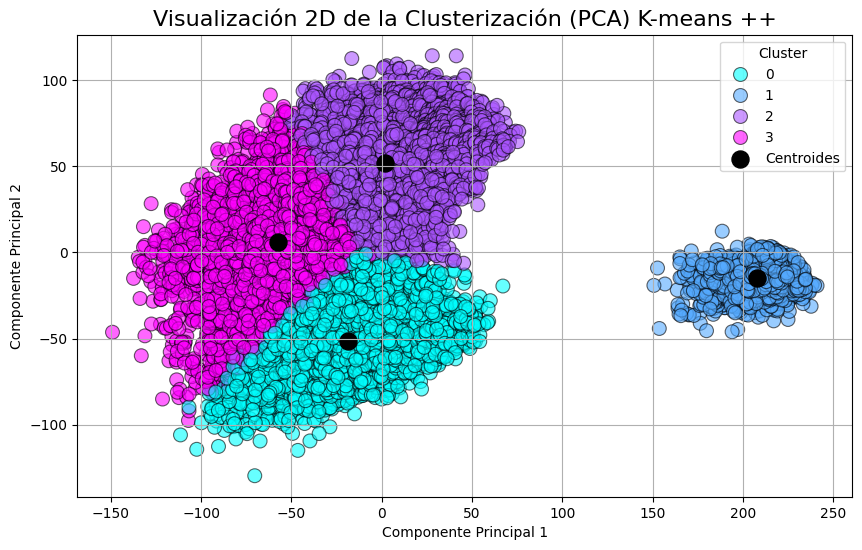

In [149]:
# Importar las librerías necesarias para la visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Definir la función para graficar los clústeres en 2D
def graficar_clusters_PCA2D(clusters, metodo, centroids):
    # Crear una figura para el gráfico de dispersión 2D
    plt.figure(figsize=(10, 6))

    # Graficar los puntos de datos con su correspondiente color de clúster
    # Se usa 'hue' para colorear según el clúster, 'palette' para definir los colores
    # 'alpha' ajusta la transparencia y 's' el tamaño de los puntos
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                    hue=clusters, palette='cool',
                    alpha=0.6, s=100, edgecolor='black')  # Añadir borde negro a los puntos

    # Graficar los centroides en negro
    # Se especifica el tamaño y se añade una etiqueta para la leyenda
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=150, label='Centroides', edgecolor='black')

    # Añadir un título al gráfico
    plt.title(f'Visualización 2D de la Clusterización (PCA) {metodo}', fontsize=16)

    # Etiquetas para los ejes
    plt.xlabel('Componente Principal 1')  # Eje X
    plt.ylabel('Componente Principal 2')  # Eje Y

    # Configurar cuadrícula para mejorar la legibilidad
    plt.grid(True)

    # Añadir una leyenda que describe los clústeres
    plt.legend(title='Cluster')

    # Mostrar el gráfico en pantalla
    plt.show()

# Llamar a la función para graficar los clústeres y los centroides
# Se pasan como argumentos los clústeres, el método de agrupamiento y los centroides transformados
graficar_clusters_PCA2D(clusters_kmeans_mas, 'K-means ++', centroides_kmeans_mas_pca)

##GRAFICA 3D

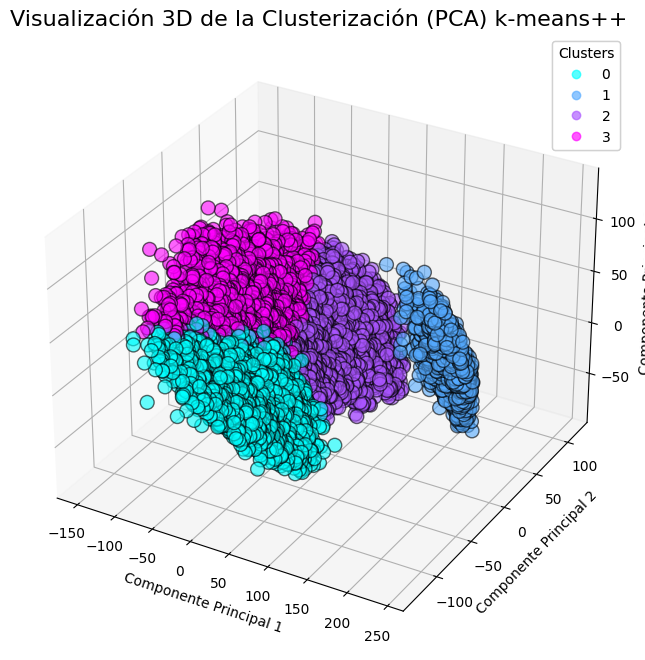

In [152]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

def graficar_clusters_PCA3D(clusters, metodo):
    # Crear el gráfico 3D
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Graficar los puntos con borde blanco
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                         c=clusters, cmap='cool', s=100,
                         edgecolor='black', alpha=0.6)

    # Etiquetas de los ejes y título
    ax.set_title(f'Visualización 3D de la Clusterización (PCA) {metodo}', fontsize=16)
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')

    # Añadir la leyenda
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)

    # Mostrar el gráfico
    plt.show()
graficar_clusters_PCA3D(clusters_kmeans_mas, 'k-means++')